# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('apple_quality.csv')

df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [2]:
df.dropna(inplace=True)
df.shape

(4000, 9)

In [3]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Quality', axis=1)
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_log = decision_tree.predict(X_test)

print(accuracy_score(y_test, y_pred_log))
print(classification_report(y_test,y_pred_log))

0.80625
              precision    recall  f1-score   support

         bad       0.80      0.82      0.81       401
        good       0.82      0.79      0.80       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



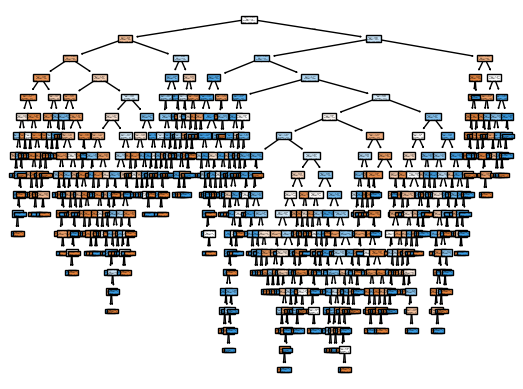

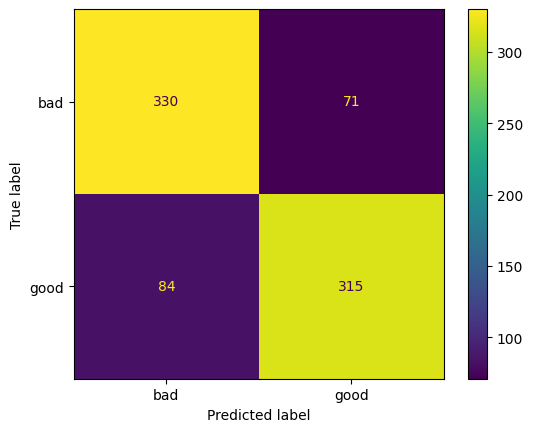

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay

plot_tree(decision_tree, filled=True)

ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test)

In [6]:
## Use Select KBest to select N amount of features.
## test this features using the same classifier you used

from sklearn.feature_selection import SelectKBest

num_of_features = 5

feature_selector = SelectKBest(k=num_of_features)

feature_selector.fit(X_train, y_train)

X_train_n_dimensions =  feature_selector.transform(X_train)
X_test_n_dimensions = feature_selector.transform(X_test)


In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Quality', axis=1)
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_log = decision_tree.predict(X_test)

print(accuracy_score(y_test, y_pred_log))
print(classification_report(y_test,y_pred_log))

0.80625
              precision    recall  f1-score   support

         bad       0.80      0.81      0.81       401
        good       0.81      0.80      0.81       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



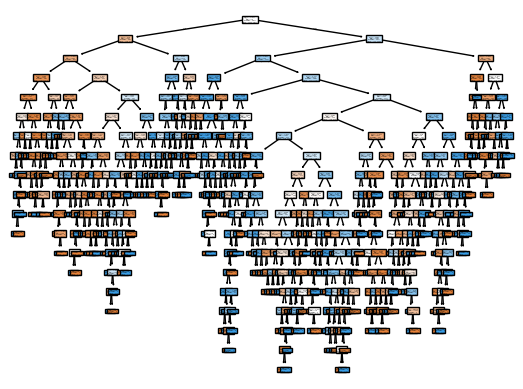

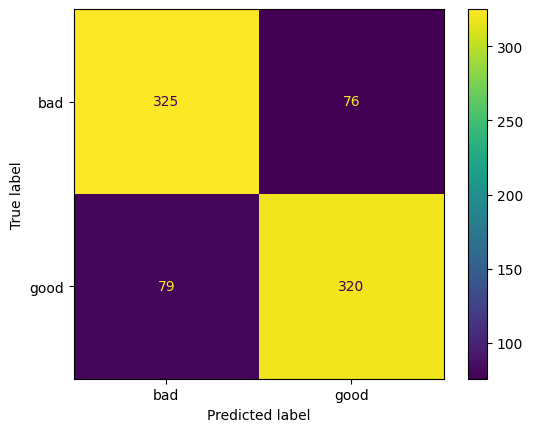

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

plot_tree(decision_tree, filled=True)

ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test)

Index(['Size', 'Sweetness', 'Juiciness', 'Ripeness', 'Acidity'], dtype='object')
Size         float64
Sweetness    float64
Juiciness    float64
Ripeness     float64
Acidity      float64
dtype: object


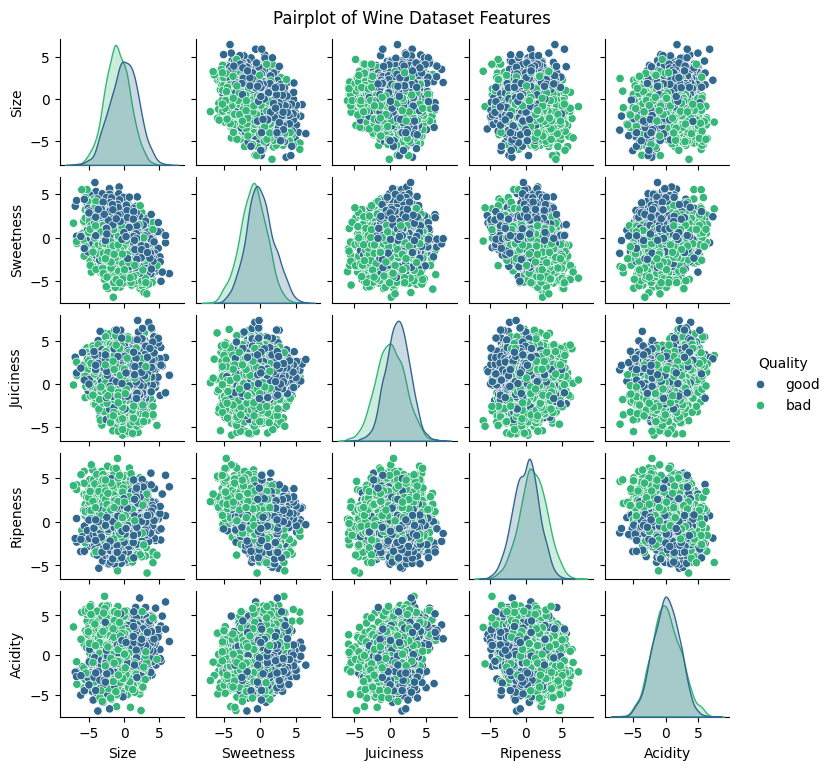

In [9]:
import numpy as np

# Get a boolean mask of selected features
selected_feature_mask = feature_selector.get_support()

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_mask]

print(selected_feature_names)

# Train classifier with selected features
## Let's visualize these features

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Quality',
             palette='viridis',
             diag_kind='kde',
             vars=selected_feature_names,
             height=1.5
             )
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show()
